# Super Mario Maker data of players and maps taken from kaggle:
https://www.kaggle.com/datasets/leomauro/smmnet/data?select=course-meta.csv


In [10]:
import pandas as pd
courses_df = pd.read_csv('data/courses.csv', delimiter='\t', usecols=['id', 'maker', 'creation', 'difficulty'])
clears_df = pd.read_csv('data/clears.csv', delimiter='\t', usecols=['catch', 'id', 'player'])
plays_df = pd.read_csv('data/plays.csv', delimiter='\t', usecols=['catch', 'id', 'player'])
records_df = pd.read_csv('data/records.csv', delimiter='\t', usecols=['catch', 'id', 'player', 'timeRecord'])
likes_df = pd.read_csv('data/likes.csv', delimiter='\t', usecols=['catch', 'id', 'player'])
players_df = pd.read_csv('data/players.csv', delimiter='\t', usecols=['id', 'flag'])

# Function to handle potential datetime parsing issues
def parse_and_format_datetime(value):
    formats = ["%Y-%m-%d %H:%M:%S.%f", "%Y-%m-%d %H:%M:%S"]
    for fmt in formats:
        try:
            dt = pd.to_datetime(value, format=fmt)
            return dt.strftime("%Y-%m-%d %H:%M:%S")
        except ValueError:
            continue
    return pd.NaT

def normalize_datetime_format(df, column):
    df[column] = df[column].apply(parse_and_format_datetime)
    return df


# Convert 'catch' columns to datetime
courses_df = normalize_datetime_format(courses_df, 'creation')
clears_df = normalize_datetime_format(clears_df, 'catch')
plays_df = normalize_datetime_format(plays_df, 'catch')
records_df = normalize_datetime_format(records_df, 'catch')
likes_df = normalize_datetime_format(likes_df, 'catch')

# Check for any remaining issues
print(courses_df['creation'].isnull().sum())
print(clears_df['catch'].isnull().sum())
print(plays_df['catch'].isnull().sum())
print(records_df['catch'].isnull().sum())
print(likes_df['catch'].isnull().sum())

# Output any rows with unparsed datetime for manual inspection
courses_invalid = courses_df[courses_df['creation'].isnull()]
clears_invalid = clears_df[clears_df['catch'].isnull()]
plays_invalid = plays_df[plays_df['catch'].isnull()]
records_invalid = records_df[records_df['catch'].isnull()]
likes_invalid = likes_df[likes_df['catch'].isnull()]

print("Courses invalid:")
print(courses_invalid['creation'])
print("Clears invalid:")
print(clears_invalid['catch'])
print("Plays invalid:")
print(plays_invalid['catch'])
print("Records invalid:")
print(records_invalid['catch'])
print("Likes invalid:")
print(likes_invalid['catch'])

0
0
0
0
0
Courses invalid:
Series([], Name: creation, dtype: object)
Clears invalid:
Series([], Name: catch, dtype: object)
Plays invalid:
Series([], Name: catch, dtype: object)
Records invalid:
Series([], Name: catch, dtype: object)
Likes invalid:
Series([], Name: catch, dtype: object)


In [11]:
maps_played = [play for play in plays_df['id'].unique() if play in courses_df['id'].unique()]
len(maps_played), len(courses_df['id'].unique())

(115032, 115032)

In [12]:
len(plays_df['player'].unique()), len(players_df['id'].unique())

(851824, 884302)

In [13]:
len(courses_df['maker'].unique())

48622

In [14]:
players_that_are_makers = [player for player in plays_df['player'].unique() if player in courses_df['maker'].unique()]

In [15]:
len(players_that_are_makers), len(plays_df['player'].unique()), len(courses_df['maker'].unique())

(32515, 851824, 48622)

32515, 851824, 48622

In [16]:
# print the number of plays for each player in the players_that_are_makers list
print(plays_df[plays_df['player'].isin(players_that_are_makers)]['player'].value_counts())
# print the mean and median amount of plays for each player in the players_that_are_makers list
plays_df[plays_df['player'].isin(players_that_are_makers)]['player'].value_counts().mean(), plays_df[plays_df['player'].isin(players_that_are_makers)]['player'].value_counts().median()

player
Conducteur59220    2681
revolv23           1437
WIIMoustique       1244
Plusbellelavie5    1234
Feuxdelamoule      1096
                   ... 
Adin22                1
Jonatanmn             1
jokinulan             1
AdriGonzo             1
jeremiusilvae         1
Name: count, Length: 32515, dtype: int64


(9.36992157465785, 3.0)

In [17]:
# print the earliest and latest timestamp in the plays_df DataFrame and in the courses_df DataFrame
plays_df['catch'].min(), plays_df['catch'].max(), courses_df['creation'].min(), courses_df['creation'].max()

('2017-11-16 14:45:36',
 '2018-04-10 11:29:38',
 '2017-02-11 23:00:00',
 '2018-04-09 11:03:11')

In [18]:
plays_df.describe()

,catch,id,player
count,3941378,3941378,3941378
unique,150201,115032,851824
top,2018-02-23 14:49:09,5AB9-0000-038F-A23E,Conducteur59220
freq,980,1673,2681


In [19]:
courses_df.describe()

,id,difficulty,maker,creation
count,115032,115032,114956,115032
unique,115032,4,48621,664
top,079D-0000-0351-17E2,normal,Zerodius,2017-02-11 23:00:00
freq,1,51354,100,921


In [20]:
# count occurences of most occuring id in plays_df
print(plays_df['id'].value_counts())
sorted(maps_played) == sorted(courses_df['id'].unique())

id
5AB9-0000-038F-A23E    1673
F44D-0000-035E-496C    1143
DE4D-0000-035D-3AE1    1089
A4E1-0000-038D-0EBC    1021
8F40-0000-0391-4B50    1014
                       ... 
9B5E-0000-030F-3700       9
4A8E-0000-0361-BA1B       9
9187-0000-032D-E326       9
A35E-0000-0331-B798       9
DAEE-0000-0359-3D34       9
Name: count, Length: 115032, dtype: int64


True

# check data quality metrics of datasets

In [21]:

# Function to check completeness
def check_completeness(df, dataset_name):
    nan_counts = df.isna().sum()
    print(f"Completeness check for {dataset_name} dataset:")
    print(nan_counts)
    print()

# Function to check temporal resolution
def check_temporal_resolution(df, timestamp_col, dataset_name):
    df[timestamp_col] = pd.to_datetime(df[timestamp_col], errors='coerce')
    min_timestamp = df[timestamp_col].min()
    max_timestamp = df[timestamp_col].max()
    time_diffs = df[timestamp_col].diff().dropna()
    avg_resolution = time_diffs.mean()
    print(f"Temporal resolution check for {dataset_name} dataset:")
    print(f"Minimum timestamp: {min_timestamp}")
    print(f"Maximum timestamp: {max_timestamp}")
    print(f"Average time difference between events: {avg_resolution}")
    print()

# Function to check additional information
def check_additional_info(df, dataset_name):
    print(f"Additional information in {dataset_name} dataset:")
    print(df.info())
    print()

# Evaluate SMMnet datasets
print("Evaluating SMMnet datasets:")
check_completeness(courses_df, "Courses")
check_completeness(plays_df, "Plays")

check_temporal_resolution(courses_df, 'creation', "Courses")
check_temporal_resolution(plays_df, 'catch', "Plays")

check_additional_info(courses_df, "Courses")
check_additional_info(plays_df, "Plays")

Evaluating SMMnet datasets:
Completeness check for Courses dataset:
id             0
difficulty     0
maker         76
creation       0
dtype: int64

Completeness check for Plays dataset:
catch     0
id        0
player    0
dtype: int64

Temporal resolution check for Courses dataset:
Minimum timestamp: 2017-02-11 23:00:00
Maximum timestamp: 2018-04-09 11:03:11
Average time difference between events: 0 days 00:02:54.255635437

Temporal resolution check for Plays dataset:
Minimum timestamp: 2017-11-16 14:45:36
Maximum timestamp: 2018-04-10 11:29:38
Average time difference between events: -1 days +23:59:59.999763535

Additional information in Courses dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115032 entries, 0 to 115031
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          115032 non-null  object        
 1   difficulty  115032 non-null  object        
 2   maker       114956 non-n

# modeling of player interactions for players that are also creators
interaction is defined as a player playing the map of another player (both are creators of some map)


maybe make a number of graphs with each graph giving a snapshot of the plays within one week.


In [22]:
plays_df.head(), courses_df.head()

(                catch                   id       player
 0 2018-02-23 15:22:44  0000-0000-0353-3D35    darter60k
 1 2018-02-23 15:22:44  0000-0000-0353-3D35  davidchofis
 2 2018-02-23 15:22:44  0000-0000-0353-3D35   fabioviana
 3 2018-02-23 15:22:44  0000-0000-0353-3D35    gorigokky
 4 2018-02-23 15:22:44  0000-0000-0353-3D35  groebenzell,
                     id   difficulty            maker   creation
 0  079D-0000-0351-17E2       expert      NolramImpro 2017-08-11
 1  07CD-0000-030D-EA60       expert         igorsssa 2017-03-11
 2  07F7-0000-030F-A51B  superExpert        Wiggle133 2017-03-14
 3  080E-0000-0307-A394       expert      vitorotavio 2017-02-26
 4  082F-0000-0358-A218       normal  CaptainToad4444 2017-08-29)

In [23]:
# Step 1: Filter plays_df to include only players that are also makers
filtered_plays_df = plays_df[plays_df['player'].isin(players_that_are_makers)]

# Step 2: Merge filtered plays_df with courses_df to include maker information
merged_df = filtered_plays_df.merge(courses_df, on='id')

In [24]:
merged_df.describe()

,catch,creation
count,304663,304663
mean,2018-02-08 02:20:54.556959744,2017-06-10 05:51:11.615965696
min,2017-11-16 14:45:36,2017-02-11 23:00:00
25%,2018-01-02 10:14:58,2017-04-08 00:00:00
50%,2018-02-23 15:05:15,2017-06-04 00:00:00
75%,2018-03-02 09:59:40,2017-08-08 00:00:00
max,2018-04-10 11:26:16,2018-04-09 11:03:11


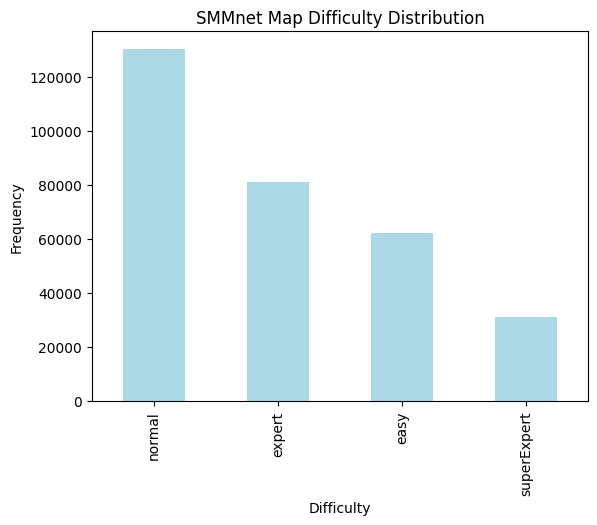

In [25]:
import matplotlib.pyplot as plt
# create a class distribution histogram for the difficulty column in the merged_df DataFrame with light blue color\
merged_df['difficulty'].value_counts().plot(kind='bar', color='lightblue')
# set the title and axis labels of the plot
plt.title('SMMnet Map Difficulty Distribution')
plt.xlabel('Difficulty')
plt.ylabel('Frequency')
# save the plot as a png file
plt.savefig('SMMnet_difficulty_distribution.png')


In [26]:
# convert catch column from datetime to UNIX timestamp
merged_df['catch_UNIX'] = merged_df['catch'].astype('int64') // 10**9
merged_df

,catch,id,player,difficulty,maker,creation,catch_UNIX
0,2018-02-23 15:22:44,0000-0000-0353-3D35,groebenzell,normal,Raphael160908,2017-08-16,1519399364
1,2018-03-02 09:46:27,0000-0000-035A-9F14,moonbear89,normal,Mr.loom,2017-09-03,1519983987
2,2017-12-18 14:47:47,0001-0000-0347-486A,alexflo59,easy,alirab,2017-07-19,1513608467
3,2017-12-18 14:47:47,0001-0000-0347-486A,cat38690,easy,alirab,2017-07-19,1513608467
4,2018-02-02 15:21:17,0001-0000-0347-486A,matheo88,easy,alirab,2017-07-19,1517584877
...,...,...,...,...,...,...,...
304658,2018-03-02 10:08:07,FFFC-0000-0346-165A,Zurix_Maker,expert,mastershow,2017-07-16,1519985287
304659,2017-12-18 16:13:11,FFFE-0000-032B-2D6F,luzuli,expert,spades,2017-05-06,1513613591
304660,2017-12-18 16:13:11,FFFE-0000-032B-2D6F,MakiseKurisu,expert,spades,2017-05-06,1513613591
304661,2018-02-23 15:07:12,FFFF-0000-035D-4849,EliasHH,easy,coyaterapace53,2017-09-12,1519398432


In [27]:
import pathpy as pp

# Step 3: Create the Temporal Network using PathPy
temporal_network = pp.TemporalNetwork()

# Add edges to the temporal network
for index, row in merged_df.iterrows():
    player_id = row['player']
    maker_id = row['maker']
    timestamp = row['catch_UNIX']
    
    if player_id != maker_id:  # Avoid self-loops if not desired
        temporal_network.add_edge(player_id, maker_id, timestamp)

# Print basic information about the temporal network
print(temporal_network)

Nodes:			46264
Time-stamped links:	304663
Links/Nodes:		6.5853147155455645
Observation period:	[1510843536, 1523359576]
Observation length:	 12516040 
Time stamps:		 25912 
Avg. inter-event dt:	 483.03963567596776
Min/Max inter-event dt:	 1/2369166


In [28]:
import networkx as nx
import matplotlib.pyplot as plt

#Step 3: Create the Temporal Network using NetworkX
G = nx.DiGraph()

# Add edges to the network
for index, row in merged_df.iterrows():
    player_id = row['player']
    maker_id = row['maker']
    timestamp = row['catch']
    
    if player_id != maker_id:  # Avoid self-loops if not desired
        G.add_edge(player_id, maker_id, timestamp=timestamp, difficulty=row['difficulty'])

# Print basic information about the network
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


Number of nodes: 46264
Number of edges: 249015


# I need to calculate average time between plays in my merged df to justify why I chose 1 week snapshot

In [29]:

merged_df['week'] = merged_df['catch'].dt.to_period('W')

# Create a list to hold the weekly graphs
weekly_graphs_pathpy = []

# Iterate over each group
for week, group in merged_df.groupby('week'):
    temporal_network = pp.TemporalNetwork()
    
    for index, row in group.iterrows():
        player_id = row['player']
        maker_id = row['maker']
        timestamp = row['catch_UNIX']
        
        if player_id != maker_id:  # Avoid self-loops if not desired
            temporal_network.add_edge(player_id, maker_id, timestamp)
    
    weekly_graphs_pathpy.append((week, temporal_network))

# Print basic information about the temporal network of the first week
print(weekly_graphs_pathpy[0][1])

Nodes:			4430
Time-stamped links:	8018
Links/Nodes:		1.8099322799097066
Observation period:	[1510843536, 1511135774]
Observation length:	 292238 
Time stamps:		 2295 
Avg. inter-event dt:	 127.39232781168265
Min/Max inter-event dt:	 1/14935


In [30]:
# print(weekly_graphs_pathpy[6][1])
nodes_per_week = [len(graph[1].nodes) for graph in weekly_graphs_pathpy]
for i in weekly_graphs_pathpy:
    print(i[0], i[1])
    print('\n \n')

2017-11-13/2017-11-19 Nodes:			4430
Time-stamped links:	8018
Links/Nodes:		1.8099322799097066
Observation period:	[1510843536, 1511135774]
Observation length:	 292238 
Time stamps:		 2295 
Avg. inter-event dt:	 127.39232781168265
Min/Max inter-event dt:	 1/14935

 

2017-11-20/2017-11-26 Nodes:			220
Time-stamped links:	204
Links/Nodes:		0.9272727272727272
Observation period:	[1511140159, 1511488831]
Observation length:	 348672 
Time stamps:		 104 
Avg. inter-event dt:	 3385.1650485436894
Min/Max inter-event dt:	 18/48459

 

2017-12-11/2017-12-17 Nodes:			374
Time-stamped links:	365
Links/Nodes:		0.9759358288770054
Observation period:	[1513350743, 1513549832]
Observation length:	 199089 
Time stamps:		 270 
Avg. inter-event dt:	 740.1078066914498
Min/Max inter-event dt:	 1/21642

 

2017-12-18/2017-12-24 Nodes:			25419
Time-stamped links:	66000
Links/Nodes:		2.596482945827924
Observation period:	[1513578579, 1513851239]
Observation length:	 272660 
Time stamps:		 6328 
Avg. inter-even

In [31]:
print(weekly_graphs_pathpy[0][1])

Nodes:			4430
Time-stamped links:	8018
Links/Nodes:		1.8099322799097066
Observation period:	[1510843536, 1511135774]
Observation length:	 292238 
Time stamps:		 2295 
Avg. inter-event dt:	 127.39232781168265
Min/Max inter-event dt:	 1/14935


In [32]:
print(weekly_graphs_pathpy[7][1])

Nodes:			1655
Time-stamped links:	1880
Links/Nodes:		1.13595166163142
Observation period:	[1517409479, 1517786165]
Observation length:	 376686 
Time stamps:		 1218 
Avg. inter-event dt:	 309.52013147082994
Min/Max inter-event dt:	 1/17154


In [33]:
print(weekly_graphs_pathpy[13][1])

Nodes:			368
Time-stamped links:	461
Links/Nodes:		1.252717391304348
Observation period:	[1523358125, 1523359576]
Observation length:	 1451 
Time stamps:		 155 
Avg. inter-event dt:	 9.422077922077921
Min/Max inter-event dt:	 1/214


In [34]:
for i in range(len(nodes_per_week)):
    nodes_per_week[i] = (i+1, nodes_per_week[i])
nodes_per_week

[(1, 4430),
 (2, 220),
 (3, 374),
 (4, 25419),
 (5, 2509),
 (6, 831),
 (7, 380),
 (8, 1655),
 (9, 224),
 (10, 29881),
 (11, 28101),
 (12, 1756),
 (13, 402),
 (14, 368)]

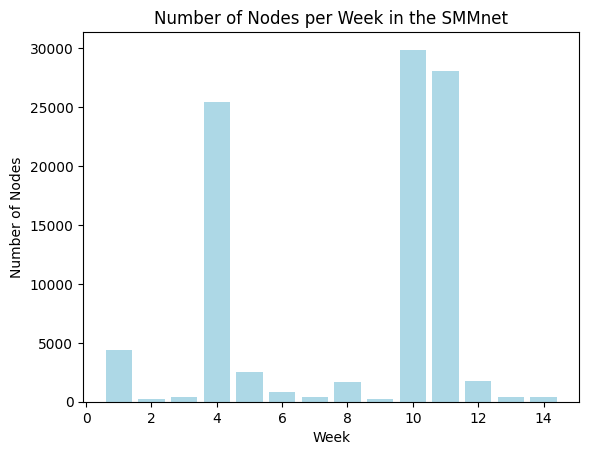

In [35]:
# use the tuples in the list nodes_per_week to plot a histogram showing the the first value of each tuple on the x-axis and the second value on the y-axis
plt.bar(*zip(*nodes_per_week), color='lightblue')
plt.xlabel('Week')
plt.ylabel('Number of Nodes')
plt.title('Number of Nodes per Week in the SMMnet')
plt.savefig('nodesPerWeekSMMnet.png')
plt.show()


# Create NetworkX graph object to get metrics

In [37]:
G = nx.MultiDiGraph()

for week, group in merged_df.groupby('week'):    
    for index, row in group.iterrows():
        player_id = row['player']
        maker_id = row['maker']
        timestamp = row['catch']
        difficulty = row['difficulty']
        week = week
        
        if player_id != maker_id:
            G.add_edge(player_id, maker_id, time=timestamp, difficulty=difficulty, week=week)    
list(G.edges(data=True))

[('BlutwurstBoy81',
  'matheusarquer',
  {'time': Timestamp('2017-11-16 16:24:05'),
   'difficulty': 'normal',
   'week': Period('2017-11-13/2017-11-19', 'W-SUN')}),
 ('BlutwurstBoy81',
  'KevinSull',
  {'time': Timestamp('2018-02-23 14:45:34'),
   'difficulty': 'normal',
   'week': Period('2018-02-19/2018-02-25', 'W-SUN')}),
 ('BlutwurstBoy81',
  'rapideur2',
  {'time': Timestamp('2018-02-23 15:15:29'),
   'difficulty': 'normal',
   'week': Period('2018-02-19/2018-02-25', 'W-SUN')}),
 ('BlutwurstBoy81',
  'tfghgd',
  {'time': Timestamp('2018-02-23 14:47:23'),
   'difficulty': 'expert',
   'week': Period('2018-02-19/2018-02-25', 'W-SUN')}),
 ('BlutwurstBoy81',
  'drafalgalo',
  {'time': Timestamp('2018-02-23 14:43:44'),
   'difficulty': 'expert',
   'week': Period('2018-02-19/2018-02-25', 'W-SUN')}),
 ('matheusarquer',
  'Vinicc11',
  {'time': Timestamp('2017-11-16 14:53:48'),
   'difficulty': 'normal',
   'week': Period('2017-11-13/2017-11-19', 'W-SUN')}),
 ('matheusarquer',
  'Murilo

In [38]:
G_list_weekly = []

for week, group in merged_df.groupby('week'):
    G_week = nx.MultiDiGraph()   
    for index, row in group.iterrows():
        player_id = row['player']
        maker_id = row['maker']
        timestamp = row['catch']
        difficulty = row['difficulty']
        week = week
        
        if player_id != maker_id:
            G_week.add_edge(player_id, maker_id, time=timestamp, difficulty=difficulty, week=week)
    G_list_weekly.append((week, G_week))   
G_list_weekly

[(Period('2017-11-13/2017-11-19', 'W-SUN'),
  <networkx.classes.multidigraph.MultiDiGraph at 0x2610be23090>),
 (Period('2017-11-20/2017-11-26', 'W-SUN'),
  <networkx.classes.multidigraph.MultiDiGraph at 0x2611aade7d0>),
 (Period('2017-12-11/2017-12-17', 'W-SUN'),
  <networkx.classes.multidigraph.MultiDiGraph at 0x2609840db10>),
 (Period('2017-12-18/2017-12-24', 'W-SUN'),
  <networkx.classes.multidigraph.MultiDiGraph at 0x2610be17590>),
 (Period('2018-01-01/2018-01-07', 'W-SUN'),
  <networkx.classes.multidigraph.MultiDiGraph at 0x261128fc350>),
 (Period('2018-01-08/2018-01-14', 'W-SUN'),
  <networkx.classes.multidigraph.MultiDiGraph at 0x2610bdc4810>),
 (Period('2018-01-15/2018-01-21', 'W-SUN'),
  <networkx.classes.multidigraph.MultiDiGraph at 0x2611d917b90>),
 (Period('2018-01-29/2018-02-04', 'W-SUN'),
  <networkx.classes.multidigraph.MultiDiGraph at 0x26093569450>),
 (Period('2018-02-05/2018-02-11', 'W-SUN'),
  <networkx.classes.multidigraph.MultiDiGraph at 0x2612070a0d0>),
 (Period('

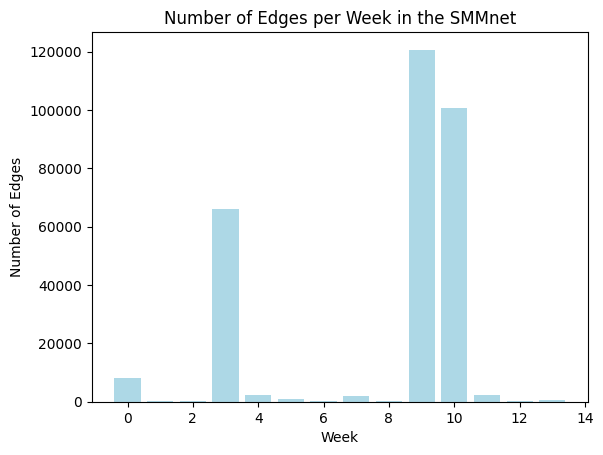

In [39]:
edges_per_week = []
for i in G_list_weekly:
    edges_per_week.append(len(i[1].edges()))
# make a histogram showing the number of edges per week using the edges_per_week list where the index of the list is the week number and the value is the number of edges
plt.bar(range(len(edges_per_week)), edges_per_week, color='lightblue')
plt.xlabel('Week')
plt.ylabel('Number of Edges')
plt.title('Number of Edges per Week in the SMMnet')
plt.savefig('edgesPerWeekSMMnet.png')
plt.show()

In [40]:
import pickle

# save weekly graphs
for i, graph in enumerate(G_list_weekly):
    filename = f'SMMnet_graph_week_{i}.pkl'
    with open(filename, 'wb') as f:
        pickle.dump(graph[1], f)

# save full graph
with open('SMMnet_graph_FULL.pkl', 'wb') as f:
        pickle.dump(G, f)

print("Graphs have been saved as pickle files.")

Graphs have been saved as pickle files.


In [ ]:
len(list(G.edges(data=True))), len(G_list_weekly)

(304663, 14)

## Calculate metrics for snapshots

In [ ]:
import Temporal_Metrics as tm
import importlib
importlib.reload(tm)

In [ ]:
len(G_list_weekly[0][1].edges()), len(G_list_weekly[7][1].edges()), len(G_list_weekly[8][1].edges()), len(G_list_weekly[9][1].edges()), len(G_list_weekly[13][1].edges())

(8018, 1880, 155, 120692, 461)

In [ ]:
temp_degree_1 = tm.temporal_degree(G_list_weekly[0][1])
temp_degree_2 = tm.temporal_degree(G_list_weekly[7][1])
temp_degree_3 = tm.temporal_degree(G_list_weekly[13][1])

In [ ]:
closeness_1 = tm.temporal_closeness(G_list_weekly[7][1])

In [ ]:
closeness_2 = tm.temporal_closeness(G_list_weekly[0][1])
closeness_3 = tm.temporal_closeness(G_list_weekly[13][1])

In [ ]:
betweenness_2 = tm.temporal_betweenness(G_list_weekly[7][1])

## Make a graph from week 8 and 9 to calculate the final metrics for reporting

In [ ]:
G_w_8 = G_list_weekly[7][1]
G_w_9 = G_list_weekly[8][1]

# add all nodes and edges from G_w_9 to G_w_8
G_w_8.add_nodes_from(G_w_9.nodes(data=True))
G_w_8.add_edges_from(G_w_9.edges(data=True))

len(G_w_8.edges(data=True))

2035

In [ ]:
# print basic information about the G_w_8 graph object using NetworkX
print(f"Number of nodes: {G_w_8.number_of_nodes()}")
print(f"Number of edges: {G_w_8.number_of_edges()}")


Number of nodes: 1771
Number of edges: 2035


In [ ]:
# use these metrics for analysis
temp_degree_8 = tm.temporal_degree(G_w_8)
closeness_8 = tm.temporal_closeness(G_w_8)
betweenness_8 = tm.temporal_betweenness(G_w_8)


# Put metrics into data frame

In [ ]:
import pandas as pd

# Create DataFrame from temp_degree dictionary
df_metrics_W2 = pd.DataFrame(list(temp_degree_8.items()), columns=['node_id', 'temp_degree'])

# Add new column that maps node_id to corresponding value in node_department_dict
df_metrics_W2['closeness'] = df_metrics_W2['node_id'].map(closeness_8)
df_metrics_W2['betweenness'] = df_metrics_W2['node_id'].map(betweenness_8)
# df_metrics_W1['department'] = df_metrics_W1['node_id'].map(node_department_dict)
df_metrics_W2

,node_id,temp_degree,closeness,betweenness
0,matheo88,2,7.445632e-13,0.000000e+00
1,alicia1807,12,1.377510e-11,0.000000e+00
2,samsofi95,6,5.956747e-12,0.000000e+00
3,AshDacal64,1,7.446514e-13,6.387470e-07
4,chachacharmin,2,7.446521e-13,0.000000e+00
...,...,...,...,...
1004,Yoshi57140,1,3.722093e-13,0.000000e+00
1005,EricBoingo1,1,3.721765e-13,0.000000e+00
1006,kingsuscha,1,3.722276e-13,0.000000e+00
1007,m2o0l0i1,1,3.721792e-13,0.000000e+00


In [ ]:
# count NaN values per column in df_metrics_W2
df_metrics_W2.isna().sum()

node_id        0
temp_degree    0
closeness      0
betweenness    0
dtype: int64

In [ ]:
descriptive_stats = df_metrics_W2.describe()
print(descriptive_stats)

       temp_degree     closeness  betweenness
count  1009.000000  1.009000e+03  1009.000000
mean      2.016848  1.537538e-12     0.000001
std       2.810961  2.524967e-12     0.000013
min       1.000000  3.721327e-13     0.000000
25%       1.000000  3.723255e-13     0.000000
50%       1.000000  3.723263e-13     0.000000
75%       2.000000  1.116978e-12     0.000000
max      44.000000  1.787074e-11     0.000252


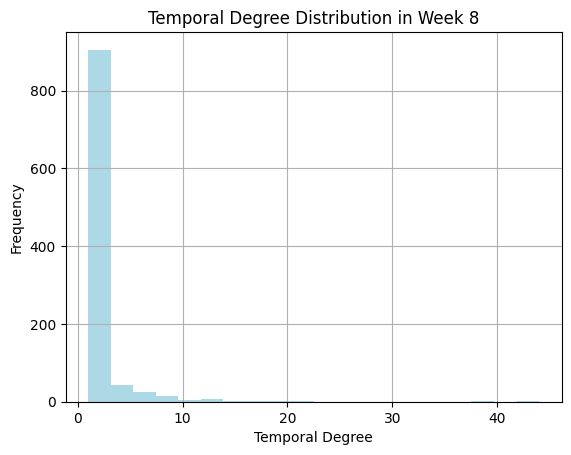

In [ ]:
# plot the distribution of the temp_degree column in df_metrics_W2
df_metrics_W2['temp_degree'].hist(color='lightblue', bins=20)
plt.xlabel('Temporal Degree')
plt.ylabel('Frequency')
plt.title('Temporal Degree Distribution in Week 8')
plt.savefig('temporal_degree_distribution_week_8.png')
plt.show()

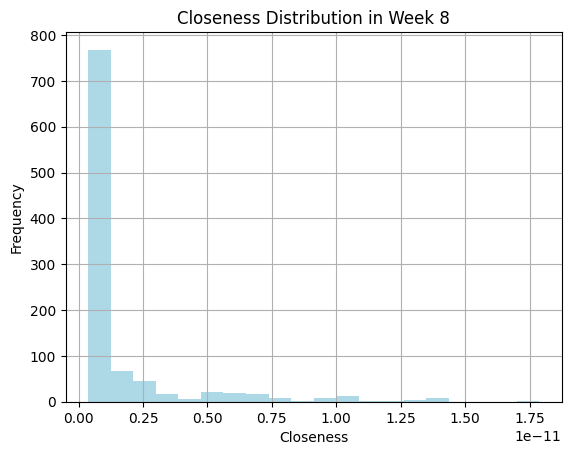

In [ ]:
# plot the distribution of the closeness column in df_metrics_W2
df_metrics_W2['closeness'].hist(color='lightblue', bins=20)
plt.xlabel('Closeness') 
plt.ylabel('Frequency')
plt.title('Closeness Distribution in Week 8')
plt.savefig('closeness_distribution_week_8.png')
plt.show()


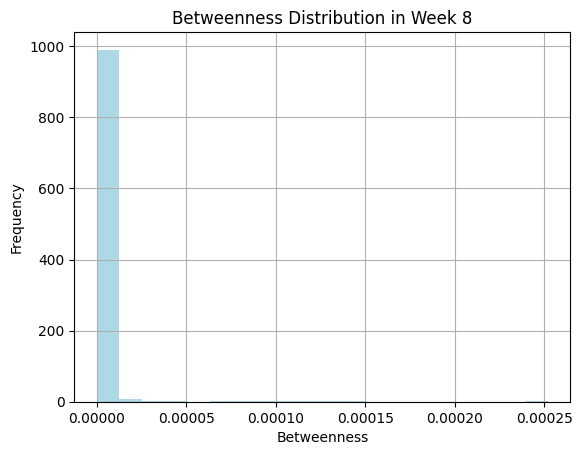

In [ ]:
# plot the distribution of the betweenness column in df_metrics_W2
df_metrics_W2['betweenness'].hist(color='lightblue', bins=20)
plt.xlabel('Betweenness')
plt.ylabel('Frequency')
plt.title('Betweenness Distribution in Week 8')
plt.savefig('betweenness_distribution_week_8.png')
plt.show()

In [ ]:
df_metrics_W2.to_csv('df_metrics_W2_csv')

In [ ]:
import Temporal_Metrics_2 as tm2
degree_2 = tm2.temporal_degree(G_list_weekly[7][1])
closeness_2 = tm2.temporal_closeness(G_list_weekly[7][1])
betweenness_2 = tm2.temporal_betweenness(G_list_weekly[7][1])

In [ ]:
# visualize the pathpy temporal network objects weekly_graphs_pathpy[8][1] and weekly_graphs_pathpy[9][1]
print(weekly_graphs_pathpy[8][1])
print(weekly_graphs_pathpy[9][1])


Nodes:			224
Time-stamped links:	155
Links/Nodes:		0.6919642857142857
Observation period:	[1517789235, 1518199515]
Observation length:	 410280 
Time stamps:		 153 
Avg. inter-event dt:	 2699.2105263157896
Min/Max inter-event dt:	 15/13205
Nodes:			29881
Time-stamped links:	120692
Links/Nodes:		4.039088383922894
Observation period:	[1519137748, 1519595828]
Observation length:	 458080 
Time stamps:		 4460 
Avg. inter-event dt:	 102.73155416012558
Min/Max inter-event dt:	 1/14229
